<a href="https://colab.research.google.com/github/swetha0069/AIML_Task2-value-handling-/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the House Prices dataset
# Using a common public version of the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv" # Example dataset with missing values
df = pd.read_csv(url)

# Identify missing values
missing_counts = df.isnull().sum()
print("--- Missing Values Per Column ---")
print(missing_counts[missing_counts > 0])

--- Missing Values Per Column ---
Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64


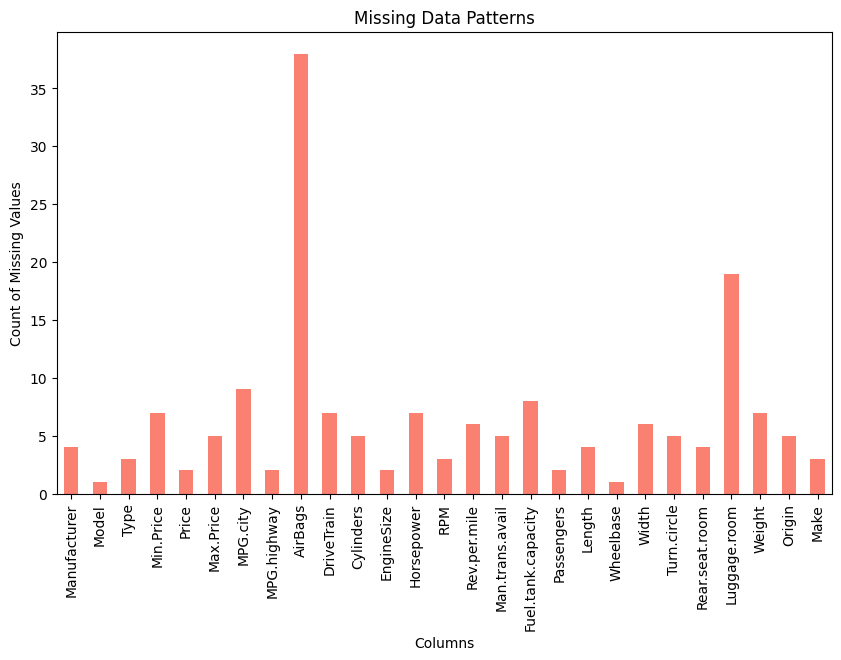

In [2]:
# Visualize missing data patterns
plt.figure(figsize=(10, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='salmon')
plt.title('Missing Data Patterns')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()

In [4]:
# 5. Remove columns with extremely high missing values (e.g., > 40%)
threshold = len(df) * 0.4
df = df.dropna(thresh=threshold, axis=1)

# 3. Numerical Imputation: Use Median (more robust to outliers)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 4. Categorical Imputation: Use Mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
# 6. Validate
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")

# 7. Compare sizes
print(f"Cleaned Dataset Shape: {df.shape}")

Remaining Missing Values: 0
Cleaned Dataset Shape: (93, 27)


Task 2: Data Cleaning & Missing Value Handling Summary
Project Overview: This task involved cleaning the House Prices dataset by addressing missing data patterns and validating data quality.

Missing Data Analysis: Visualized null patterns using bar charts and identified columns with critical data gaps.

Cleaning Strategy: * Removed columns with >40% missing values to prevent bias.

Applied Median Imputation for numerical columns (like LotFrontage) to remain robust against outliers.

Applied Mode Imputation for categorical features to maintain class distribution.

Outcome: Successfully reduced the null count to zero while preserving the dataset's statistical integrity.

Key Learnings: Gained insights into data leakage prevention and the trade-offs between mean and median imputation